In [92]:
#Import the Libraries needed

import pandas as pd #dataframe
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

df = pd.read_csv(r"C:\Users\Luthfy\Desktop\Movie Industry Project - Python\movies.csv") #include 'r' to prevent unicode error



In [93]:
#Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [94]:
# Check for missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [95]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [96]:
# Changed columns data type
df['budget'] = df['budget'].fillna(0) # replace all of the nan values in the column with zero then change data type
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0) # replace all of the nan values in the column with zero then change data type
df['gross'] = df['gross'].astype('int64')


In [97]:
# confirm changes
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [98]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [99]:
# Drop duplicates
pd.set_option('display.max_rows', None) # displaying all rows
df['company'].drop_duplicates().sort_values(ascending = False) # dropping duplicates

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [106]:
# Let's start testing out our hypothesis by looking at the correlation between the budget vs gross (should be high)
# We will also look at correlation between company vs gross (should be high)

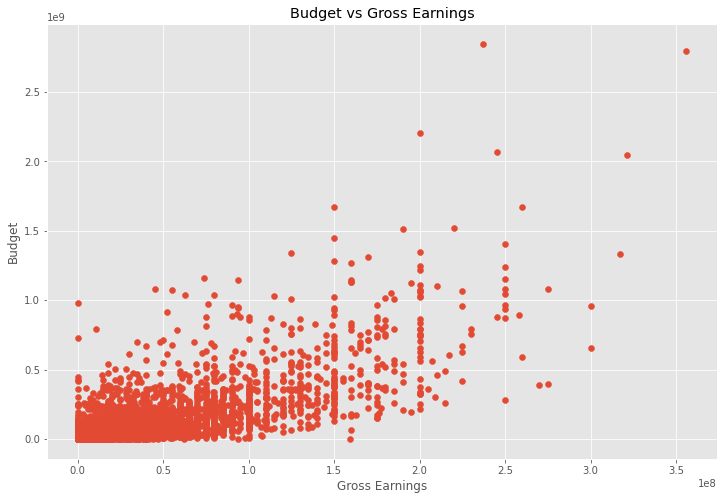

In [101]:
# Build a scatter plot
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel("Gross Earnings")
plt.ylabel("Budget")
plt.show()

In [102]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


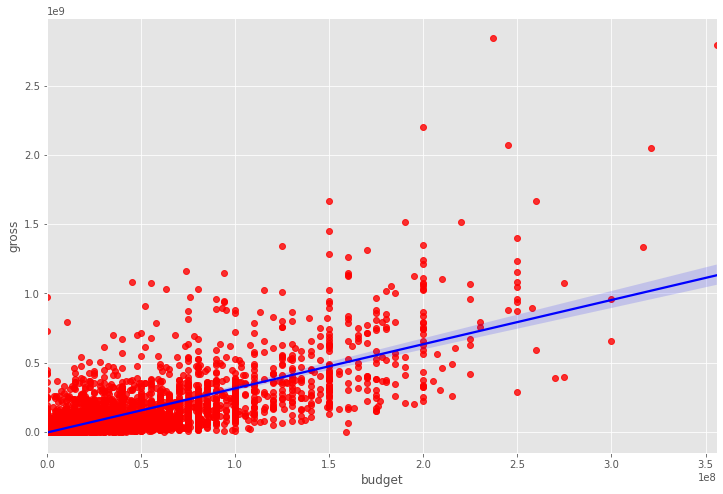

In [103]:
# Using Seaborn for a reg plot

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [104]:
df.corr() 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [105]:
# There is a high Correlation between budget and gross income is hypothesis

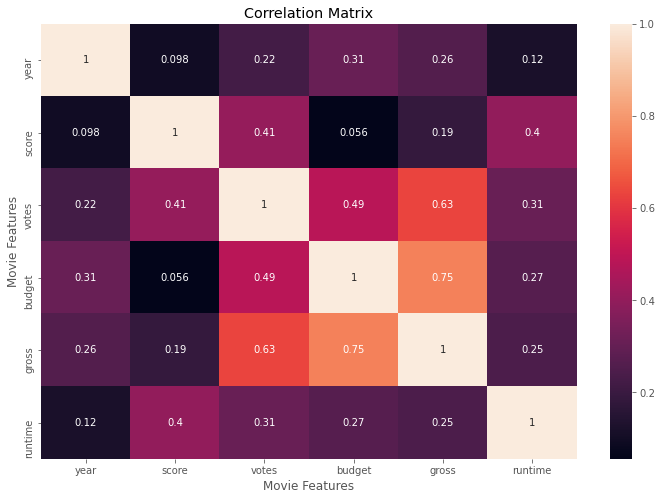

In [78]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [79]:
# Let's look at the company now vs gross earnings
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [89]:
df_numer = df

for col_name in df_numer.columns:
    if(df_numer[col_name].dtype == 'object'):
        df_numer[col_name] = df_numer[col_name].astype('category')
        df_numer[col_name] = df_numer[col_name].cat.codes

df_numer.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


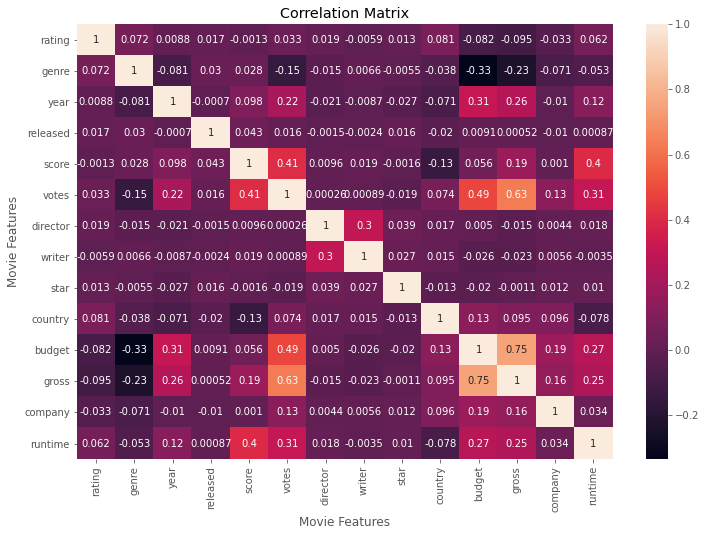

In [82]:
corr_matrix = df_numer.corr()

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [84]:
# unstacking
corr_mat = df_numer.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

rating    rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.062145
genre     rating      0.072423
          genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027965
          votes      -0.145307
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          budget     -0.334021
          gross      -0.234297
          company    -0.071067
          runtime    -0.052711
year      rating      0.008779
          genre      -0.081261
          year        1.000000
          released   -0.000695
        

In [86]:
sort_pairs = corr_pairs.sort_values()
sort_pairs

budget    genre      -0.334021
genre     budget     -0.334021
gross     genre      -0.234297
genre     gross      -0.234297
votes     genre      -0.145307
genre     votes      -0.145307
score     country    -0.133348
country   score      -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
rating    budget     -0.081939
budget    rating     -0.081939
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    budget     -0.025911
budget    writer     -0.025911
writer    gross      -0.022997
gross     writer     -0.022997
year    

In [88]:
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
rating    rating      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Gross and budget have the highest correlation and hypothesis proven correct
# Company and gross don't have a high correlation meaning the company name doesn't effect earnings